In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
os.chdir('..')

In [3]:
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

from data_loading import get_movielens_data
from evaluation import evaluate_policy
from policies.bcmabrp import BCMABRP
from policies.cbrap import CBRAP
from policies.linucb import LinUCB
from policies.linear_ts import LinearTS
from policies.random import RandomPolicy
from policies.egreedy import EGreedy
from reduct_matrix import get_reduct_matrix

from sklearn.model_selection import train_test_split

In [4]:
PROJECT_DIR = '.'

In [5]:
# Reproducibility
seed = 42
np.random.seed(seed)

In [6]:
data = get_movielens_data()
(
    actions, action_features, action_biases, user_stream,
    true_user_features, user_features, user_biases, reward_list, ratings_list
) = data

In [7]:
red_dim = 24
reduct_matrix = get_reduct_matrix("movielens", red_dim, load_old_reduct_matrix=False)

In [8]:
times = 100000

In [9]:
def plot_ctrs(reward_dict):
    fig, ax = plt.subplots(1,1, figsize=(15, 7));
    
    N = 100
    
    reward_list = sorted(
        [
            (l,r) for l, r in reward_dict.items()
        ],
        key=lambda x: x[1][-1],
        reverse=True,
    )
    
    for label, reward in reward_list:
        times = (range(1, len(reward)+1))
        ctr = [r/t for r,t in zip(reward, times)]
        ax.plot(ctr[N:], label=label)
        
    ax.set_xlabel('Trial')
    ax.set_ylabel('CTR')
    ax.set_title('CTR on MovieLens')

    plt.legend();
    plt.show();

In [10]:
def plot_ndcg(cumulative_ndcg_dict):
    fig, ax = plt.subplots(1,1, figsize=(15, 7));
    
    N = 100
    
    cumulative_ndcg_list = sorted(
        [
            (l,r) for l, r in cumulative_ndcg_dict.items()
        ],
        key=lambda x: x[1][-1],
        reverse=True,
    )
    
    for label, cumulative_ndcg in cumulative_ndcg_list:
        times = (range(1, len(cumulative_ndcg)+1))
        average_cumulative_ndcg = [cn/t for cn,t in zip(cumulative_ndcg, times)]
        ax.plot(average_cumulative_ndcg[N:], label=label)
        
    ax.set_xlabel('Trial')
    ax.set_ylabel('Average Cumulative NDCG@5')
    ax.set_title('Average Cumulative NDCG@5 on MovieLens')

    plt.legend();
    plt.show();

### Define policies

In [11]:
total_start_ts = time.time()

In [12]:
ctx_dim = 120


policies = {
    'BCMABRP': BCMABRP(context_dimension=ctx_dim, red_dim=red_dim, reduct_matrix=reduct_matrix, nu=0.65, seed=seed),
    'CBRAP': CBRAP(context_dimension=ctx_dim, red_dim=red_dim, reduct_matrix=reduct_matrix, alpha=0.5),
    'EGreedy': EGreedy(epsilon=0.6),
    'LinearTS': LinearTS(context_dimension=ctx_dim, nu=0.2, seed=seed),
    'LinUCB': LinUCB(context_dimension=ctx_dim, alpha=0.5),
    'Random': RandomPolicy(),
}

### Run evaluation

In [13]:
results = {'reward': {}, 'ndcg': {}}
for p_name, policy in policies.items():
    start_ts = time.time()

    reward, ndcg = evaluate_policy(
        policy, times, actions, action_features, action_biases, user_stream,
        true_user_features, user_features, user_biases, reward_list, ratings_list, ratings_range=[0.0, 20.0]
    )
    results['reward'][p_name] = reward
    results['ndcg'][p_name] = ndcg
    print(f"Total reward of {p_name} is {reward[-1][0]}")
    print(f"Total time of {p_name} is {datetime.timedelta(seconds=time.time() - start_ts)}")


WARNING !!!
Feature flag is ON, using NEW evaluation function

First user in exp from 2008-10-31 23:45:33
Last user in exp from 2009-01-05 05:52:22
0
5000
10000
15000
20000
25000
30000
35000
40000
45000
50000
55000
60000
65000
70000
75000
80000
85000
90000
95000
Total reward of BCMABRP is 72695.0
Total time of BCMABRP is 0:16:15.273077

WARNING !!!
Feature flag is ON, using NEW evaluation function

First user in exp from 2008-10-31 23:45:33
Last user in exp from 2009-01-05 05:52:22
0
5000
10000
15000
20000
25000
30000
35000
40000
45000
50000
55000
60000
65000
70000
75000
80000
85000
90000
95000
Total reward of CBRAP is 73859.0
Total time of CBRAP is 0:17:19.357422

WARNING !!!
Feature flag is ON, using NEW evaluation function

First user in exp from 2008-10-31 23:45:33
Last user in exp from 2009-01-05 05:52:22
0
5000
10000
15000
20000
25000
30000
35000
40000
45000
50000
55000
60000
65000
70000
75000
80000
85000
90000
95000
Total reward of EGreedy is 40184.0
Total time of EGreedy is 0:

### Plot results

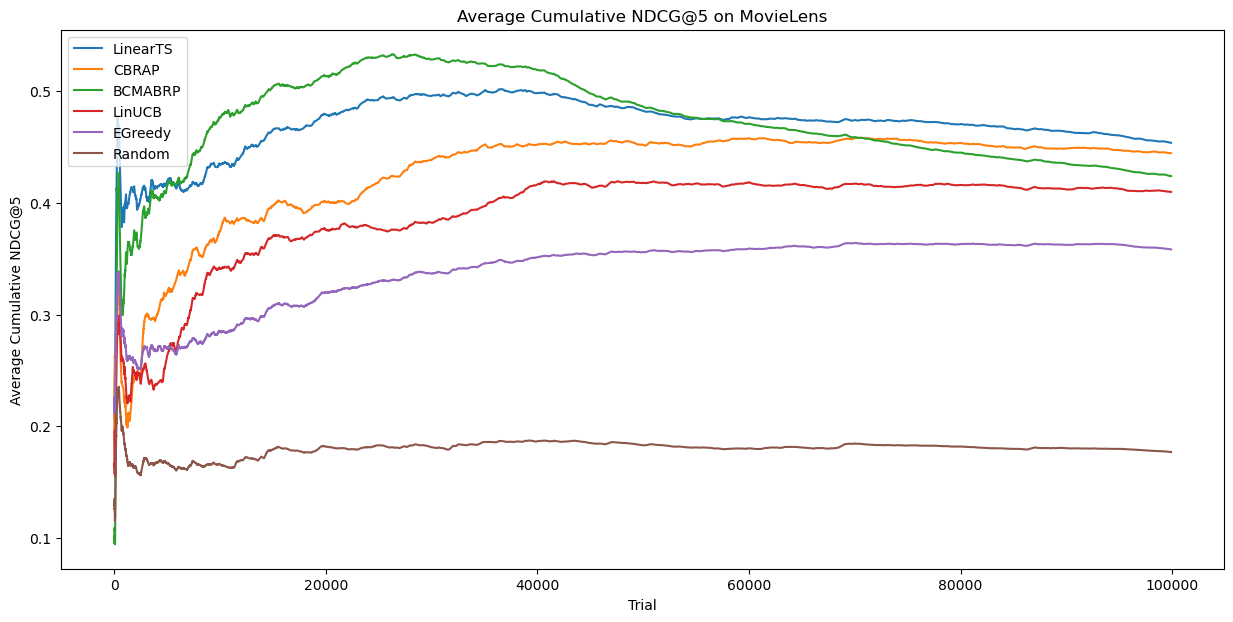

In [14]:
plot_ndcg(results['ndcg'])

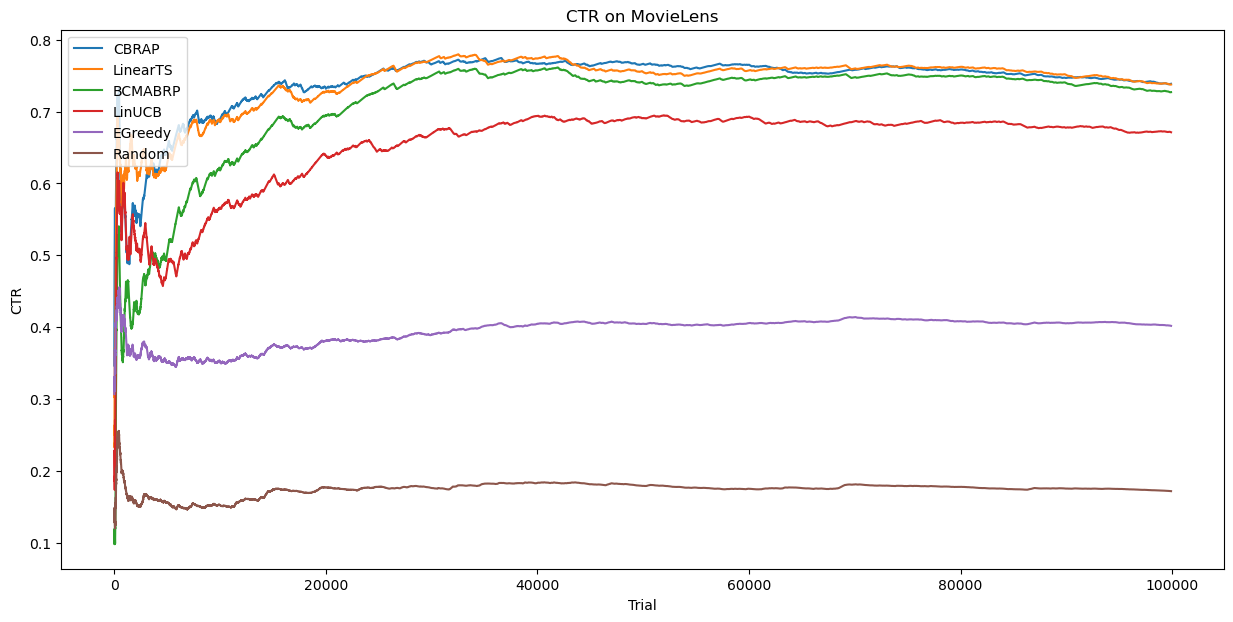

In [15]:
plot_ctrs(results['reward'])

In [16]:
print(f"Total time is {datetime.timedelta(seconds=time.time() - total_start_ts)}")

Total time is 1:46:27.035564
